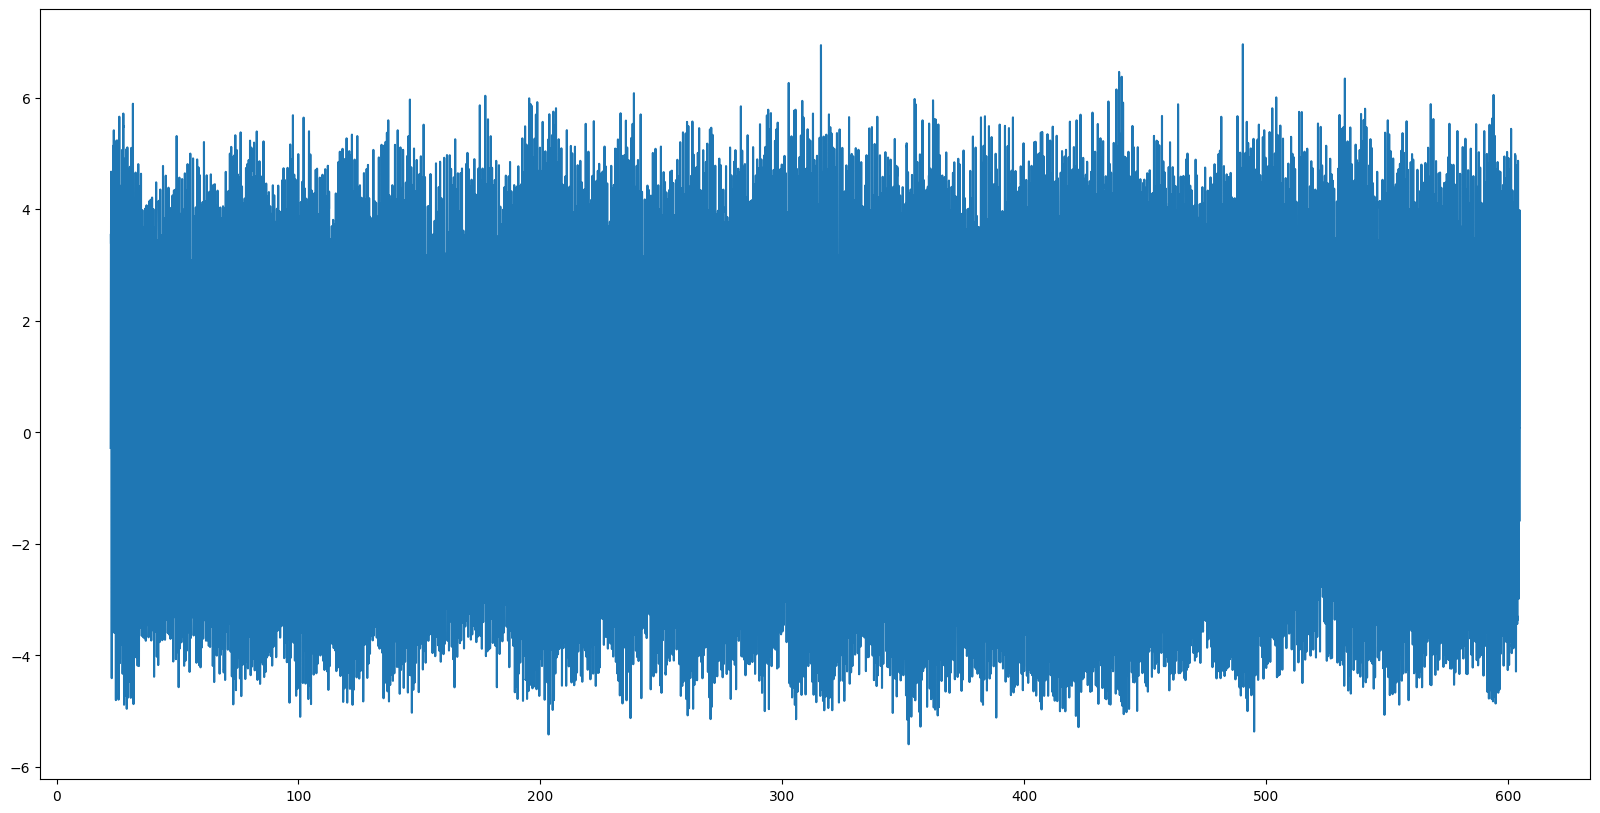

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_acc = pd.read_csv('Linear Accelerometer.csv')
df_loc = pd.read_csv('Location.csv')

plt.figure(figsize=(20,10))
plt.plot(df_acc['Time (s)'], df_acc['Z (m/s^2)'])

In [54]:
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

0         22.386054
1         22.396092
2         22.406131
3         22.416169
4         22.426208
            ...    
58038    604.887015
58039    604.897050
58040    604.907085
58041    604.917119
58042    604.927154
Name: Time (s), Length: 58043, dtype: float64
1046.0
Näytteen pituus: 604.9271543 sekuntia


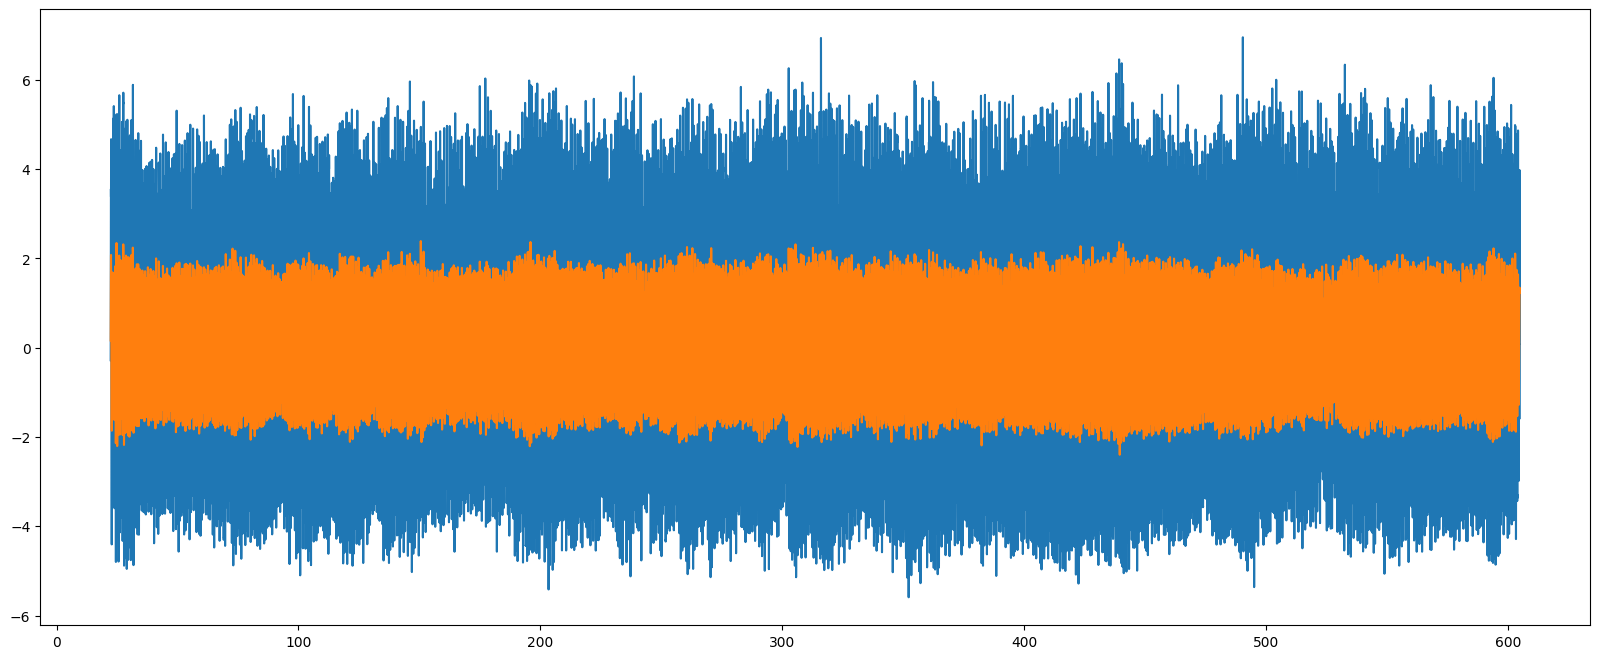

In [55]:
#Step count from filtered data
time = df_acc['Time (s)']
acceleration = df_acc['Z (m/s^2)']

T = df_acc['Time (s)'].max() #Koko datan pituus
n = len(df_acc['Time (s)']) #Datapisteiden lukumäärä
fs = n/T #Näytteenottotaajuus, OLETETAAN VAKIOKSI#Suodatetaan data
#def_butte_lowpass_filter(data, cutoff, fs, nyq, order):
data = df_acc['Z (m/s^2)']

nyq = fs/2 #Nyquist-taajuus
order = 3 #Suodattimen aste
cutoff = 1/0.6 #cut-off-taajuus

filt_signal = butter_lowpass_filter(data, cutoff, fs, nyq, order)

#Piirretään alkuperäinen a_z ja suodatettu
plt.figure(figsize=(20,8))
plt.plot(time, data)
plt.plot(time, filt_signal)

print(time)


#Count steps
jaksot = 0
for i in range(n-1):
    if filt_signal[i]/filt_signal[i+1] < 0: #True jos nollan ylitys, False muuten
        jaksot += 1

tot_steps_from_filtered_data = jaksot/2
print(tot_steps_from_filtered_data)
print("Näytteen pituus:", T, "sekuntia")

Text(0.5, 1.0, 'Tehospektri')

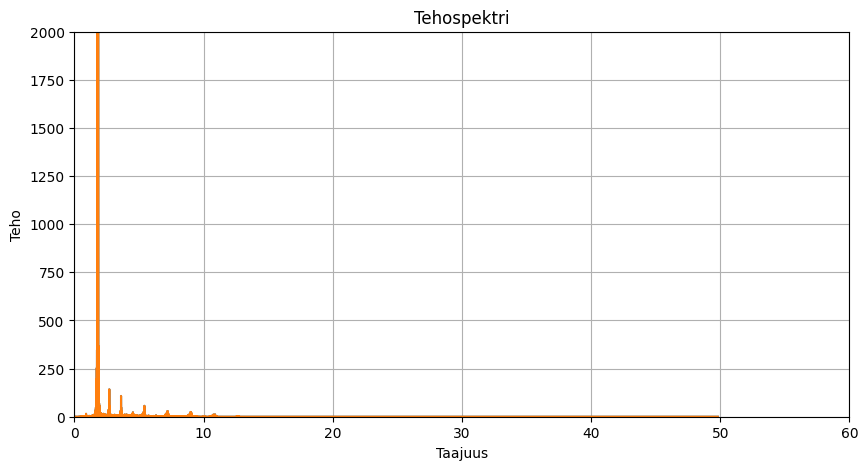

In [61]:
# Tehospektri PSD

time = df_acc['Time (s)']
data = df_acc['Z (m/s^2)']

N = len(data)
T = time.max() - time.min()
dt = T / N
fourier = np.fft.fft(data, N)
psd = (fourier * np.conj(fourier) / N)
freq = np.fft.fftfreq(N, dt)
L = np.arange(1, np.floor(N / 2), dtype='int')

PSD = np.array([freq[L],psd[L].real]) #Taajuudet ja tehospektrin arvot

plt.figure(figsize=(10,5))
plt.plot(freq[L], psd[L].real)
plt.plot(PSD[0,:],PSD[1,:])
plt.axis([0, 60, 0, 2000])
plt.grid()
plt.ylabel('Teho')
plt.xlabel('Taajuus')
plt.title('Tehospektri')


In [57]:
f_max = freq[L][psd[L] == np.max(psd[L])][0]
print("Tehokkain taajuus: ", f_max)
fourier_steps = T * f_max
print(fourier_steps)

Tehokkain taajuus:  1.8007313124032105
1049.0


In [58]:
df_loc.head()

,Time (s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (°)
0,22.389747,65.011560,25.496690,14.345736,1.535212,77.159348,10.310534,30.363735
1,23.389642,65.011563,25.496723,14.498726,1.535212,82.256403,8.833091,26.790433
2,24.389543,65.011562,25.496755,14.924797,1.409511,86.466191,9.924084,30.543262
3,25.389450,65.011562,25.496777,13.888724,1.409511,84.772663,11.496609,29.409175
4,26.389363,65.011559,25.496811,13.363152,1.408648,88.773260,8.456855,21.523182
